LIAR.tsv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cols = ['id', 'label', 'statement', 'subject', 'speaker', 'job', 'state', 'party', 'barely_true', 'false', 'half_true', 'mostly_true', 'pants_on_fire', 'context']

test = pd.read_csv("../../data/raw/test.tsv",sep='\t',names=cols)
train = pd.read_csv("../../data/raw/train.tsv",sep='\t',names=cols)
valid = pd.read_csv("../../data/raw/valid.tsv",sep='\t',names=cols)


In [3]:
liar = pd.concat([train,test,valid]).reset_index(drop=True)

fake_labels = ['pants-fire', 'false', 'barely-true']
real_labels = ['half-true', 'mostly-true', 'true']

liar['label'] = liar['label'].apply(lambda x: 'FAKE' if x in fake_labels else 'REAL')

liar['text'] = liar['statement']
liar = liar[['text','label']]

In [4]:
liar['label'].value_counts()

label
REAL    7134
FAKE    5657
Name: count, dtype: int64

In [5]:
from sklearn.utils import resample

real_df = liar[liar['label']=='REAL']
fake_df = liar[liar['label']=='FAKE']

real_downsampled = resample(real_df, replace=False,
                            n_samples=len(fake_df),
                            random_state=42
                            )

balanced_df = pd.concat([real_downsampled,fake_df]).sample(frac=1, random_state = 42)

df = balanced_df

In [6]:
df['label'].value_counts()

label
FAKE    5657
REAL    5657
Name: count, dtype: int64

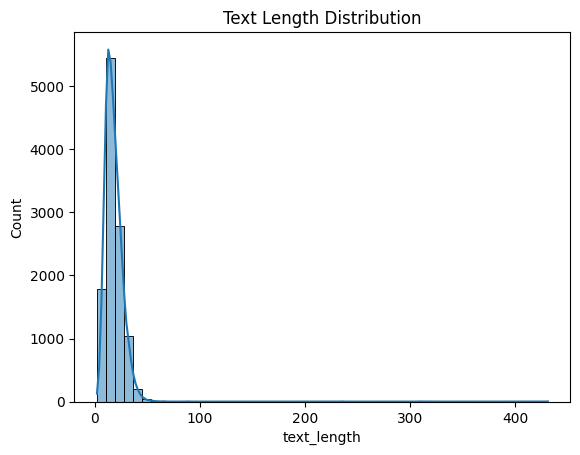

In [7]:
df['text_length']  = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_length'],bins=50, kde=True)
plt.title("Text Length Distribution")
plt.show()

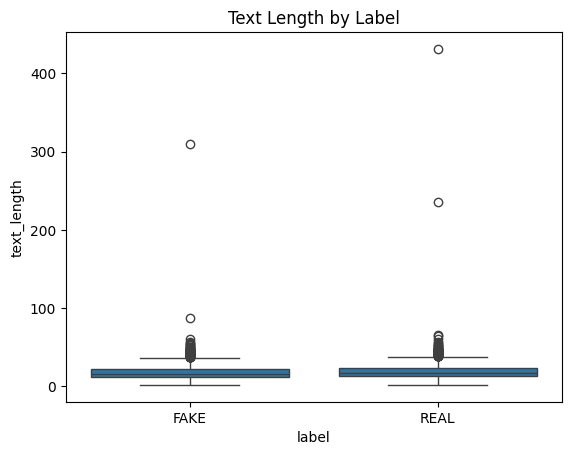

label
FAKE    17.416475
REAL    18.446526
Name: text_length, dtype: float64


In [8]:
df['text_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))

sns.boxplot(x='label',y='text_length',data=df)
plt.title("Text Length by Label")
plt.show()

print(df.groupby('label')['text_length'].mean())

In [10]:
df.to_pickle('../../data/trimmed_processed/LIAR.pkl')